In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

HOME = os.path.expanduser('~')

org = pd.read_csv(HOME + '/temp/house_train.csv')
df = org.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df.shape

(1460, 81)

In [3]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
isnull_series = df.isnull().sum()
isnull_series[isnull_series>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

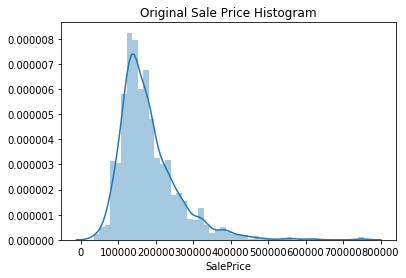

In [7]:
plt.title('Original Sale Price Histogram')
sns.distplot(df['SalePrice'])

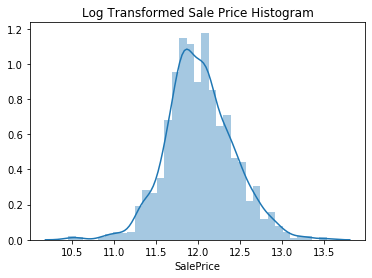

In [8]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(df['SalePrice'])
sns.distplot(log_SalePrice)

In [9]:
org_sale = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])

df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
       axis=1, inplace=True)

df.fillna(df.mean(), inplace=True)

null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
df.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [10]:
df_org = df.copy()
df_ohe = pd.get_dummies(df)
null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum() > 0]
df_ohe.dtypes[null_column_count.index]

Series([], dtype: object)

In [11]:
df = df_ohe.copy()

In [12]:
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
df.dtypes[null_column_count.index]

Series([], dtype: object)

In [13]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    p = model.predict(xte)
    mse = mean_squared_error(yte, p)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(model):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

yta = df['SalePrice']
xfe = df.drop('SalePrice', axis=1, inplace=False)

xtr, xte, ytr, yte = train_test_split(xfe, yta, test_size=0.2, random_state=156)

lr = LinearRegression()
lr.fit(xtr, ytr)

ridge = Ridge()
ridge.fit(xtr, ytr)

lasso = Lasso()
lasso.fit(xtr, ytr)

models = [lr, ridge, lasso]
get_rmses(models)

LinearRegression  로그 변환된 RMSE: 0.132
Ridge  로그 변환된 RMSE: 0.128
Lasso  로그 변환된 RMSE: 0.176


[0.1318957657915443, 0.12750846334053037, 0.17628250556471403]

In [15]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=xfe.columns)
    
    high = coef.sort_values(ascending=False).head(n)
    low = coef.sort_values(ascending=False).tail(n)
    return high, low

In [16]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(12, 20), nrows=3, ncols=1)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        high, low = get_top_bottom_coef(model)
        concat = pd.concat([high, low])
        
        axs[i].set_title(model.__class__.__name__ + ' Coeffiicient', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(8)
            
        sns.barplot(x=concat.values, y=concat.index, ax=axs[i])

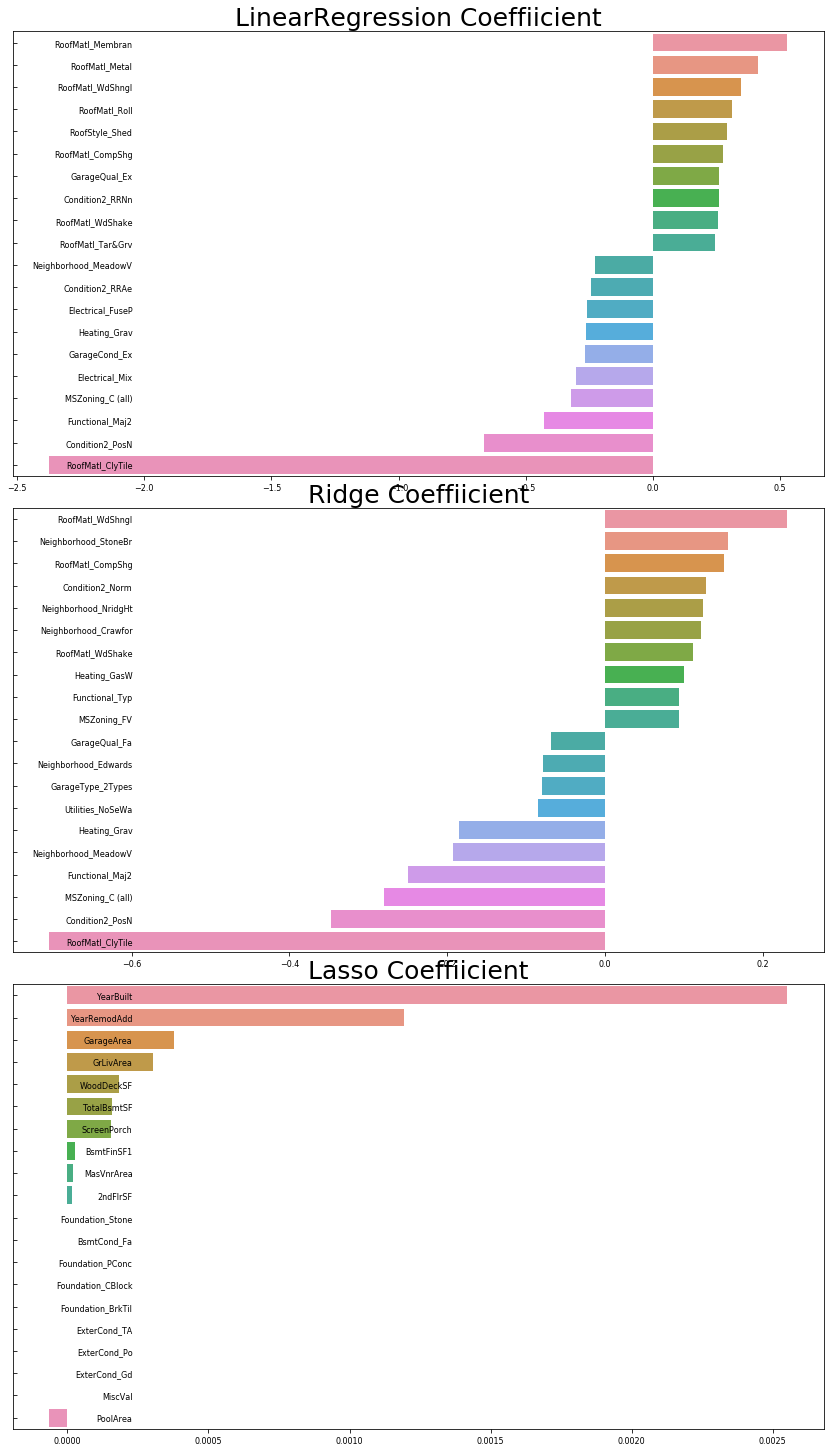

In [17]:
visualize_coefficient(models)

In [18]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, xfe, yta,
                                            scoring="neg_mean_squared_error", cv=5))
        
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

In [19]:
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값 리스트: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값 리스트: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값 리스트: 0.198


In [20]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid = GridSearchCV(model, param_grid=params,
                        scoring='neg_mean_squared_error', cv=5)
    
    grid.fit(xfe, yta)
    rmse = np.sqrt(-1 * grid.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'
          .format(model.__class__.__name__, np.round(rmse, 4), grid.best_params_))

In [21]:
r_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
l_params = {'alpha': [0.001, 0.005, 0.008, 0.05, .03, .1, .5, 1, 5, 10]}
print_best_params(ridge, r_params)
print_best_params(lasso, l_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha: {'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha: {'alpha': 0.001}


LinearRegression  로그 변환된 RMSE: 0.132
Ridge  로그 변환된 RMSE: 0.124
Lasso  로그 변환된 RMSE: 0.12


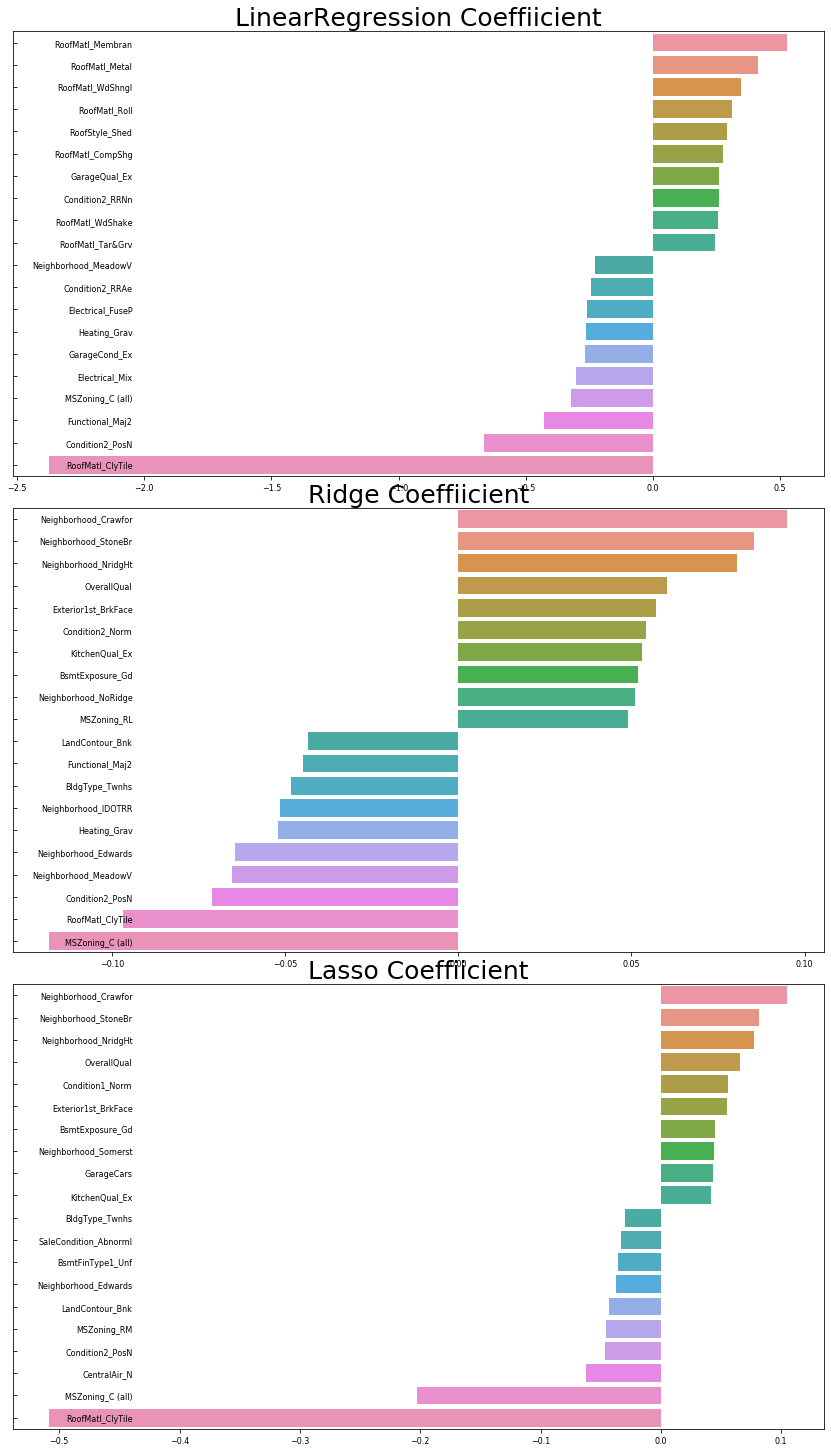

In [22]:
lr = LinearRegression()
lr.fit(xtr, ytr)

ridge = Ridge(alpha=12)
ridge.fit(xtr, ytr)

lasso = Lasso(alpha=0.001)
lasso.fit(xtr, ytr)

models = [lr, ridge, lasso]
get_rmses(models)
visualize_coefficient(models)

In [23]:
from scipy.stats import skew

feat_index = df_org.dtypes[df_org.dtypes != 'object'].index
skew_feat = df_org[feat_index].apply(lambda x : skew(x))
skew_feat_top = skew_feat[skew_feat > 1]
print(skew_feat_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [24]:
df_org[skew_feat_top.index] = np.log1p(df_org[skew_feat_top.index])

In [25]:
feat_index = df_org.dtypes[df_org.dtypes != 'object'].index
skew_feat = df_org[feat_index].apply(lambda x : skew(x))
skew_feat_top = skew_feat[skew_feat > 1]
print(skew_feat_top.sort_values(ascending=False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


In [26]:
df = pd.get_dummies(df_org)

yta = df['SalePrice']
xfe = df.drop('SalePrice', axis=1, inplace=False)

xtr, xte, ytr, yte = train_test_split(xfe, yta, test_size=0.2,
                                     random_state=156)

ridge = Ridge()
lasso = Lasso()

print_best_params(ridge, r_params)
print_best_params(lasso, l_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha: {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha: {'alpha': 0.001}


LinearRegression  로그 변환된 RMSE: 0.128
Ridge  로그 변환된 RMSE: 0.122
Lasso  로그 변환된 RMSE: 0.119


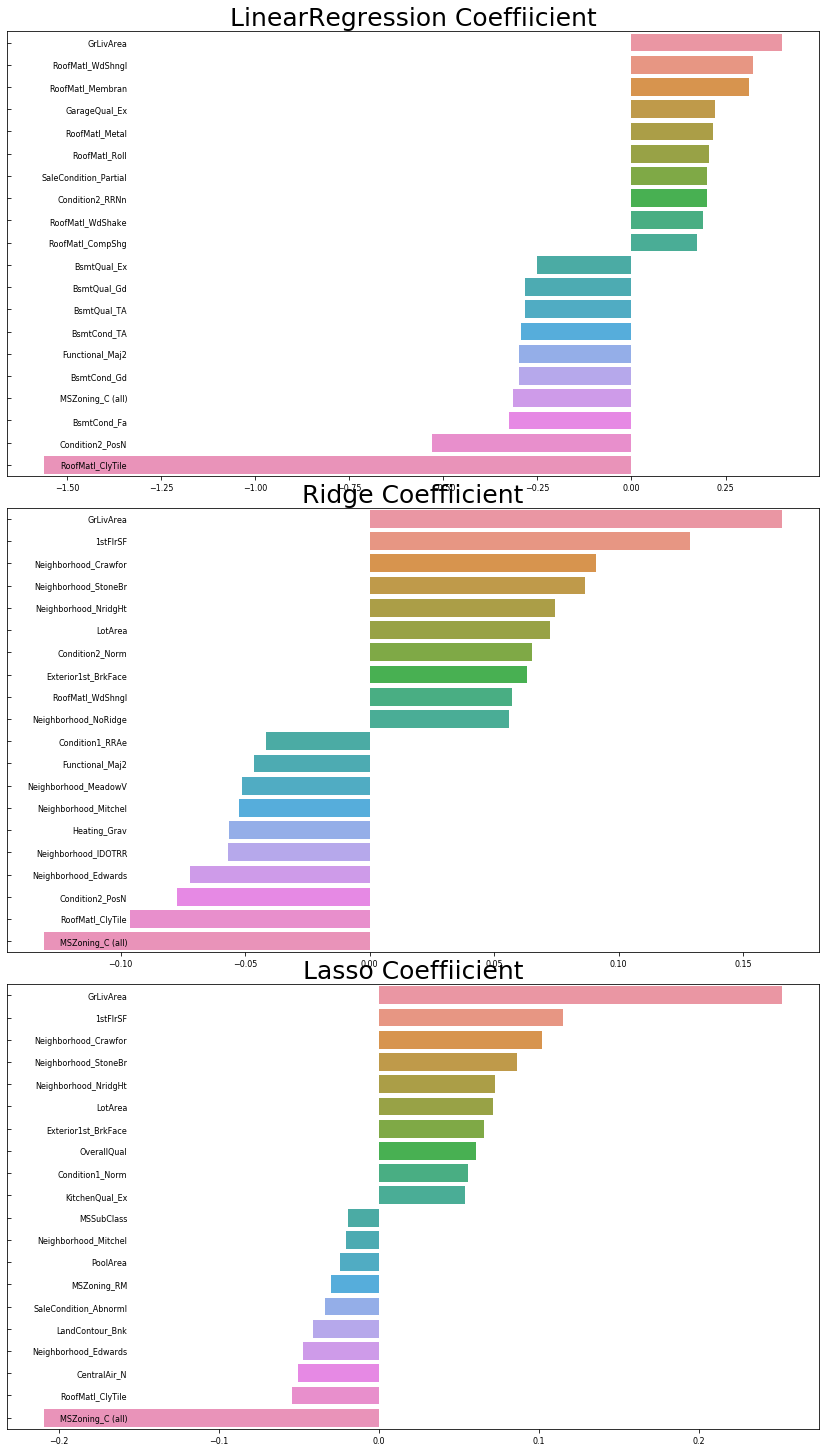

In [27]:
lr = LinearRegression()
lr.fit(xtr, ytr)

ridge = Ridge(alpha=10)
ridge.fit(xtr, ytr)

lasso = Lasso(alpha=0.001)
lasso.fit(xtr, ytr)

models = [lr, ridge, lasso]
get_rmses(models)
visualize_coefficient(models)

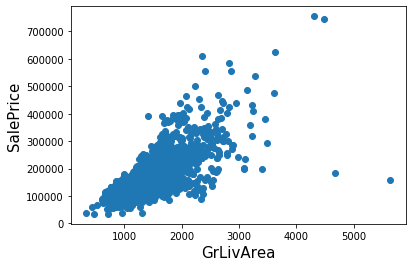

In [28]:
plt.scatter(x=org['GrLivArea'], y=org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [29]:
cond1 = df['GrLivArea'] > np.log1p(4000)
cond2 = df['SalePrice'] < np.log1p(500000)
outlier = df[cond1 & cond2].index

print(outlier.values)
df.shape

[ 523 1298]


(1460, 271)

In [30]:
df.drop(outlier, axis=0, inplace=True)
df.shape

(1458, 271)

In [31]:
yta = df['SalePrice']
xfe = df.drop('SalePrice', axis=1, inplace=False)

xtr, xte, ytr, yte = train_test_split(xfe, yta, test_size=0.2,
                                     random_state=156)

ridge = Ridge()
lasso = Lasso()

print_best_params(ridge, r_params)
print_best_params(lasso, l_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha: {'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha: {'alpha': 0.001}


LinearRegression  로그 변환된 RMSE: 0.129
Ridge  로그 변환된 RMSE: 0.103
Lasso  로그 변환된 RMSE: 0.1


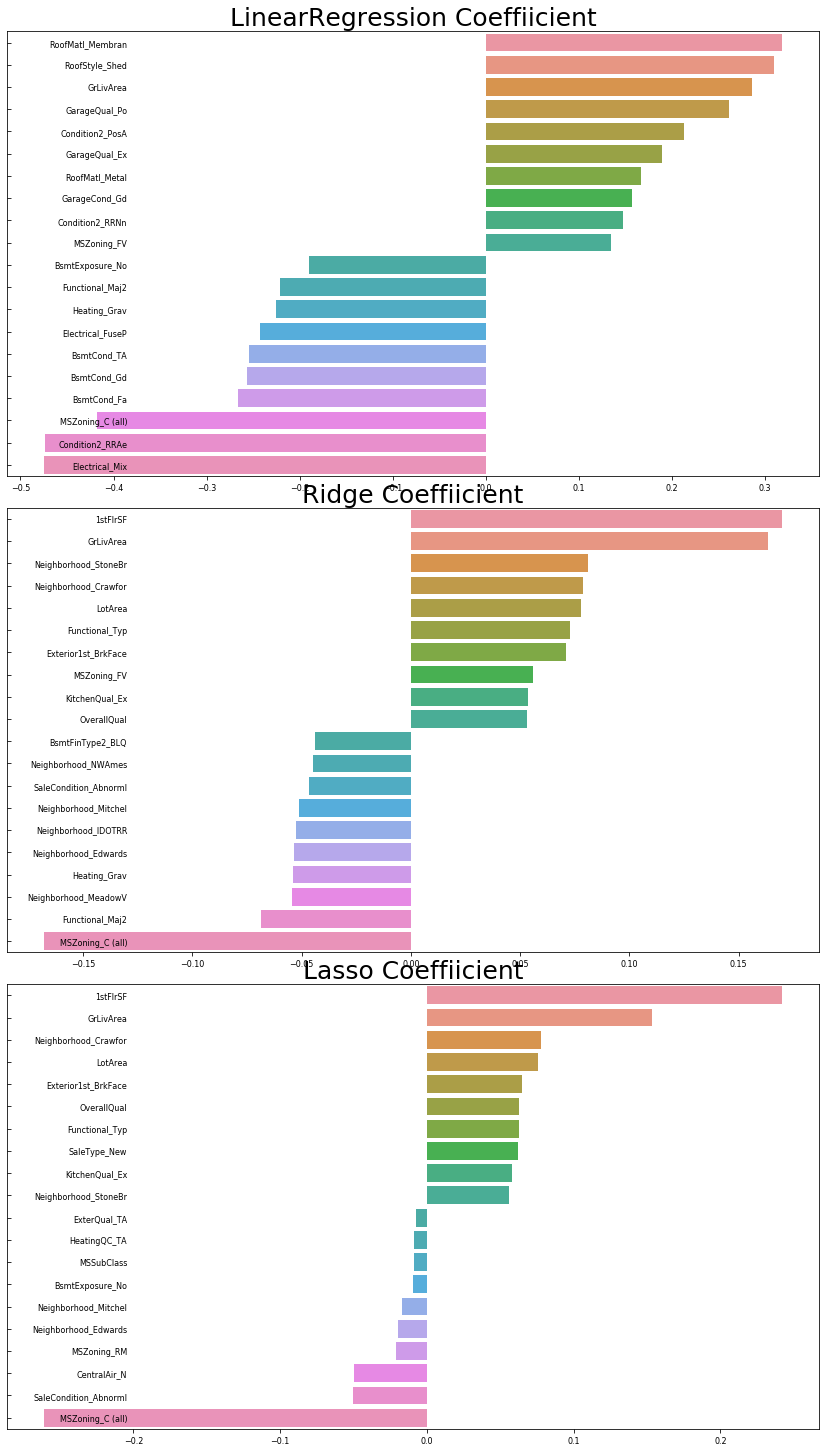

In [32]:
lr = LinearRegression()
lr.fit(xtr, ytr)

ridge = Ridge(alpha=8)
ridge.fit(xtr, ytr)

lasso = Lasso(alpha=0.001)
lasso.fit(xtr, ytr)

models = [lr, ridge, lasso]
get_rmses(models)
visualize_coefficient(models)

In [33]:
from xgboost import XGBRegressor
x_params = {'n_eastimators': [1000]}

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb, x_params)

[15:55:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1147, 최적 alpha: {'n_eastimators': 1000}


In [34]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [1000]}
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, n_jobs=-1,
                    subsample=0.6, colsample_bytree=0.4, reg_lambda=10)
print_best_params(lgbm, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1165, 최적 alpha: {'n_estimators': 1000}


AttributeError: Coefficients are not defined for Booster type gbtree

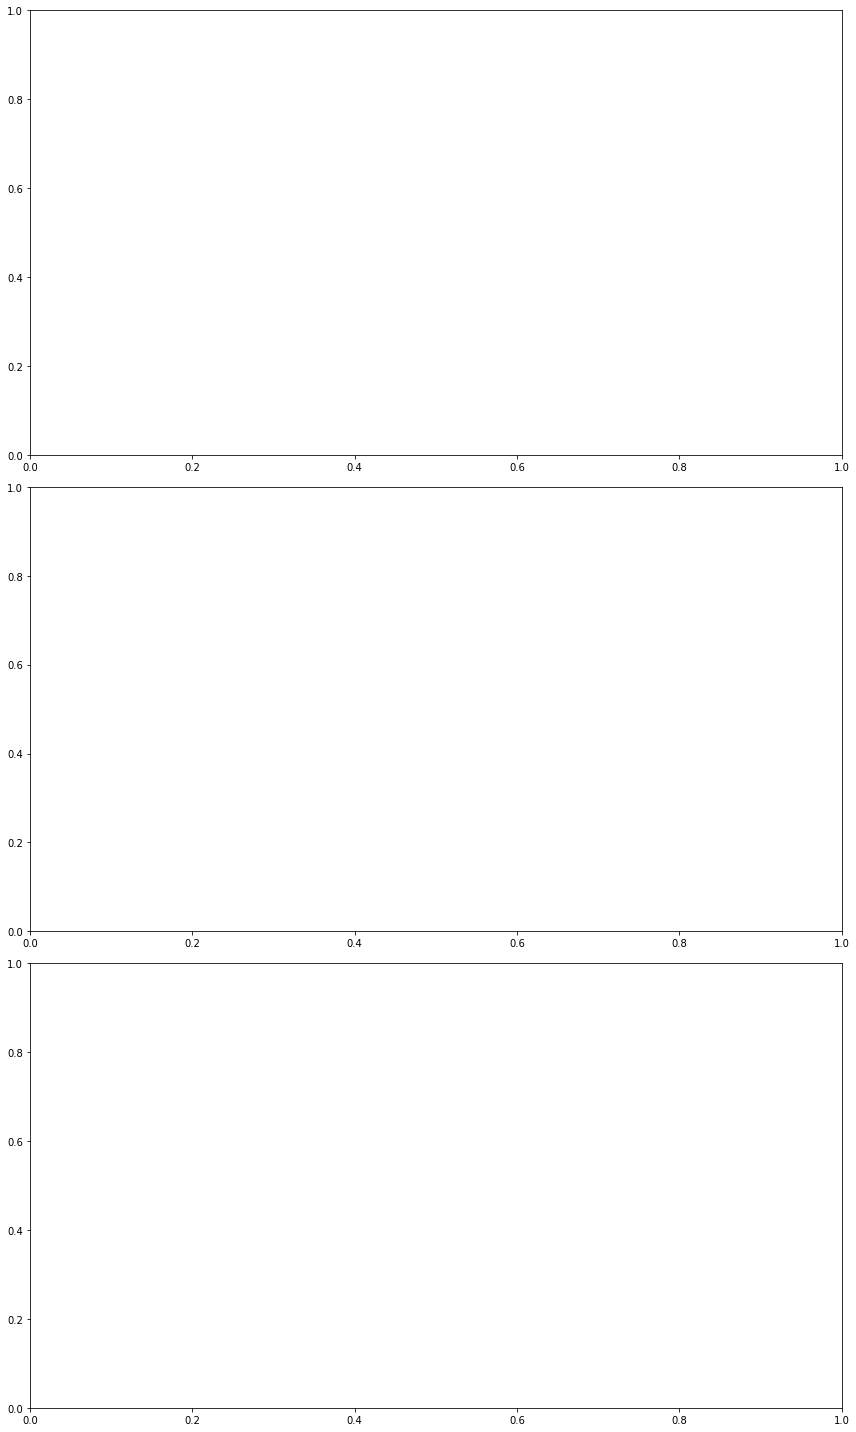

In [35]:
models = [xgb, lgbm]
visualize_coefficient(models)

[15:55:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


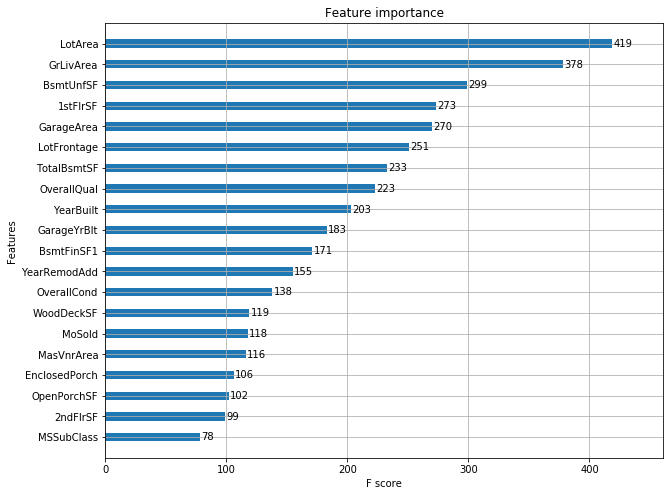

In [36]:
from xgboost import plot_importance

xgb.fit(xtr, ytr)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb, ax=ax, max_num_features=20, height=0.4)

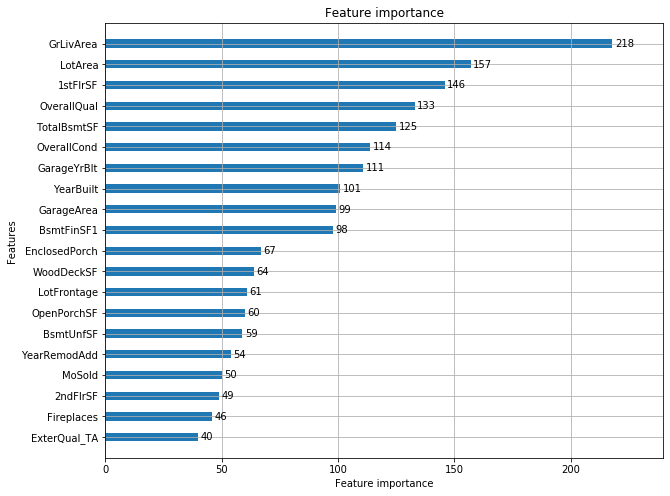

In [37]:
from lightgbm import plot_importance

lgbm.fit(xtr, ytr)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(lgbm, ax=ax, max_num_features=20, height=0.4)

In [38]:
def get_rmse_predict(p):
    for key in p.keys():
        p_value = p[key]
        mse = mean_squared_error(yte, p_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

In [39]:
ridge = Ridge(alpha=0.8)
ridge.fit(xtr, ytr)

lasso = Lasso(alpha=0.01)
lasso.fit(xtr, ytr)

ridge_p = ridge.predict(xte)
lasso_p = lasso.predict(xte)

ps = 0.4 * ridge_p + 0.6 * lasso_p
pss = {'Mixed': ps,
      'Ridge': ridge_p,
      'Lasso': lasso_p}

get_rmse_predict(pss)

Mixed 모델의 RMSE: 0.10695084084422503
Ridge 모델의 RMSE: 0.11290736875948888
Lasso 모델의 RMSE: 0.12404285185655546


In [40]:
xgb_p = xgb.predict(xte)
lgbm_p = lgbm.predict(xte)

pred = 0.5 * xgb_p + 0.5 * lgbm_p
preds = {'Mixed': pred,
        'XGBM': xgb_p,
        'LGBM': lgbm_p}

get_rmse_predict(preds)

Mixed 모델의 RMSE: 0.09892401661146341
XGBM 모델의 RMSE: 0.1014849112652202
LGBM 모델의 RMSE: 0.1015065721553885


In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, xtrn, ytrn, xten, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    fold_pred = np.zeros((xtrn.shape[0], 1))
    test_pred = np.zeros((xten.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작')
    
    for folder, (tr_idx, val_idx) in enumerate(kf.split(xtrn)):
        print('\t 폴드 세트: ', folder, ' 시작')
        x_tr = xtrn[tr_idx]
        y_tr = ytrn[tr_idx]
        x_te = xtrn[val_idx]
        
        model.fit(x_tr, y_tr)
        fold_pred[val_idx, :] = model.predict(x_te).reshape(-1, 1)
        test_pred[:, folder] = model.predict(xten)
        
    test_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    return fold_pred, test_mean

In [47]:
xtrn = xtr.values
xten = xte.values
ytrn = ytr.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge, xtrn, ytrn, xten, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso, xtrn, ytrn, xten, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb, xtrn, ytrn, xten, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm, xtrn, ytrn, xten, 5)

Ridge  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
Lasso  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
XGBRegressor  model 시작
	 폴드 세트:  0  시작
[16:06:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작
[16:06:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작
[16:06:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작
[16:06:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작
[16:06:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작


In [48]:
final_xtr = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
final_xte = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta = Lasso(alpha=0.0005)

meta.fit(final_xtr, ytr)
final = meta.predict(final_xte)
mse = mean_squared_error(yte, final)
rmse = np.sqrt(mse)
rmse

0.09862673071944213